In [1]:
#import all neccessory libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the datset
insurance_data=pd.read_csv('/content/insurance.csv')
df=insurance_data.copy()

# DATA EXPLORATION

In [3]:
df.head()#dispaly first 5 columns of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


IDENTIFY COLUMNS IN THE DATASET

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

SHAPE OF THE DATA..NO OF ROWS AND COLUMNS

In [5]:
df.shape

(1338, 7)

BASIC INFORMATIONS ABOUT THE DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


STATISTICS OF NUMERICAL COLUMNS

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Statistics of categorical columns

In [8]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


MISSING VALUE DETECTION

In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


NO missing values

REMOVE DUPLICATE ROWS

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace=True)# there is 1 duplicated row,remove it

In [12]:
df.shape

(1337, 7)

# UNIVARIATE AND BIVARIATE ANALYSIS
'charges' is the target column


DIstribution of Numerical columns

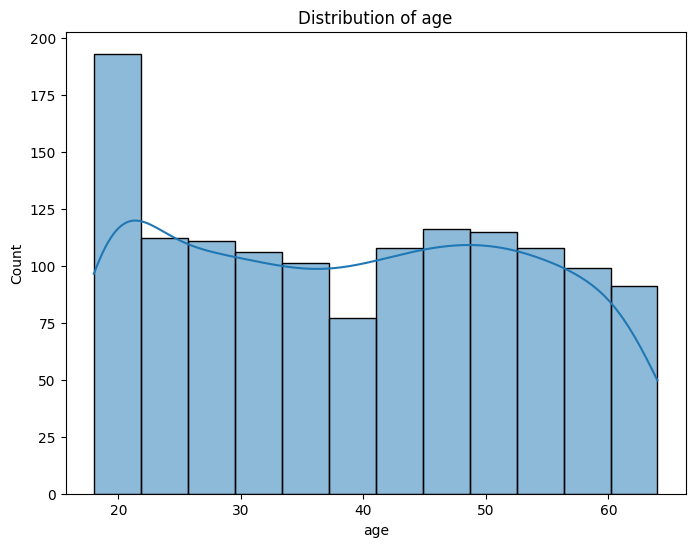

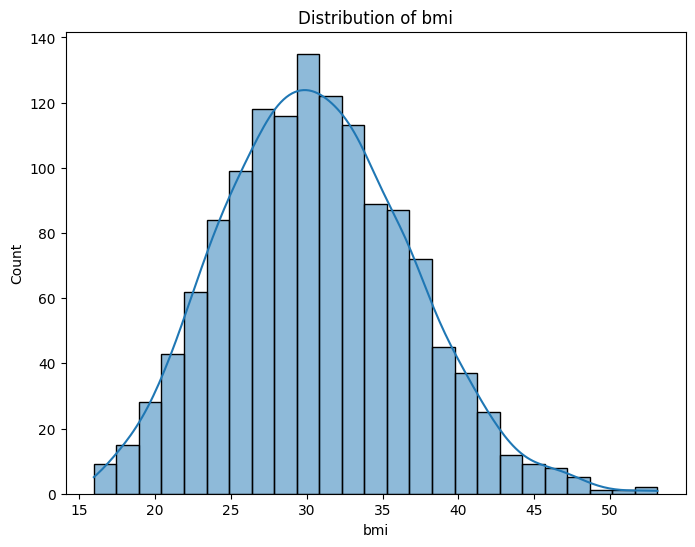

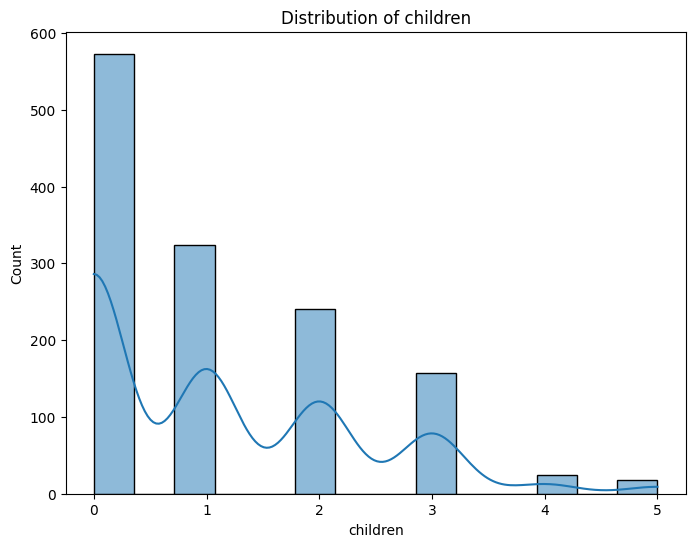

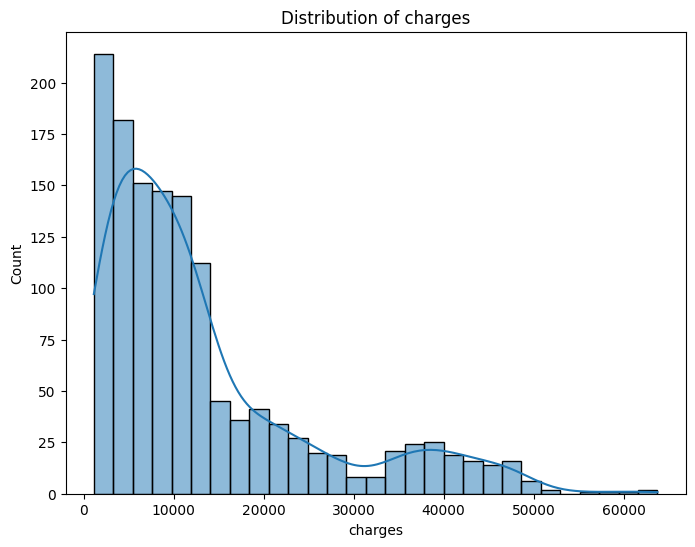

In [13]:
num_cols = ['age', 'bmi', 'children', 'charges']
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=col,kde=True)
    plt.title(f'Distribution of {col}')

RELATION SHIP BETWEEN OTHER NUMERICAL FEATURES AND TARGET

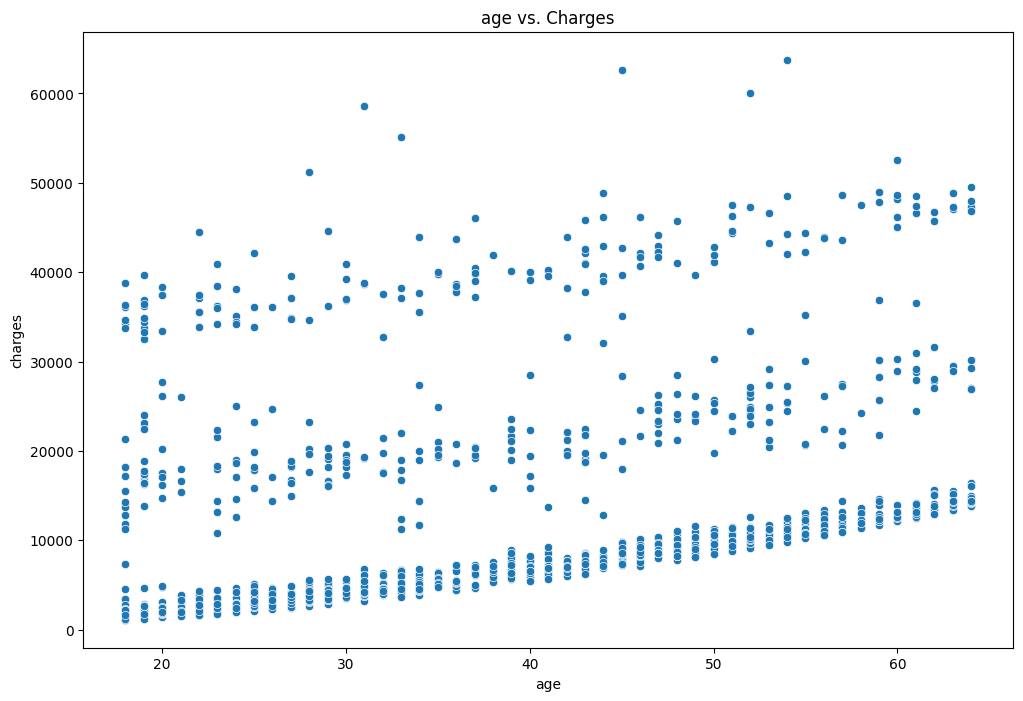

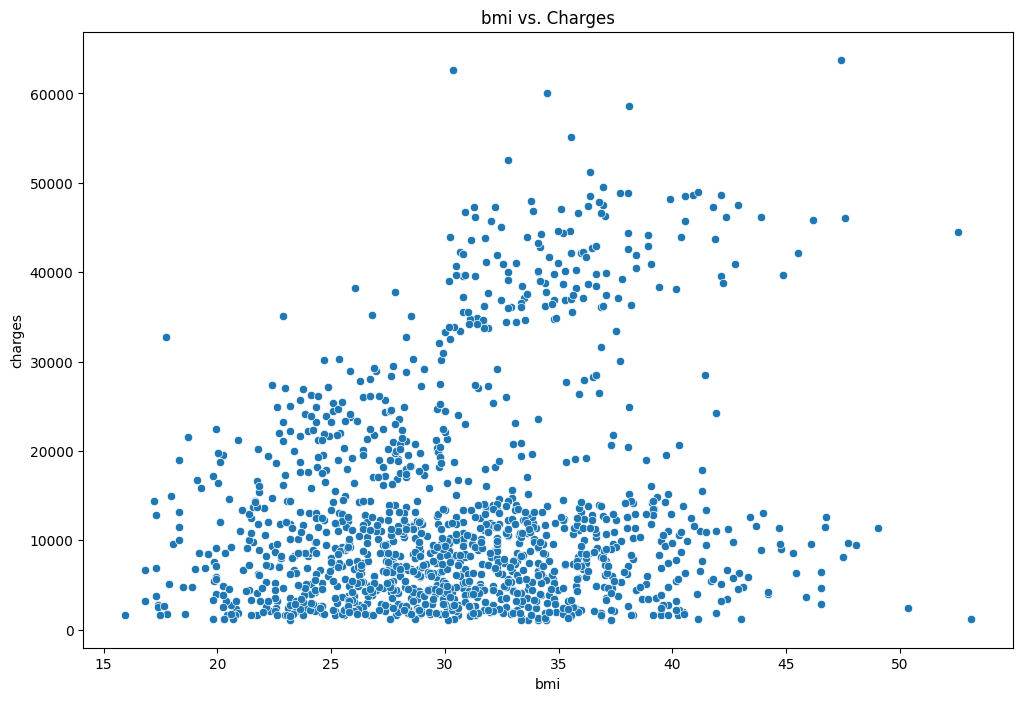

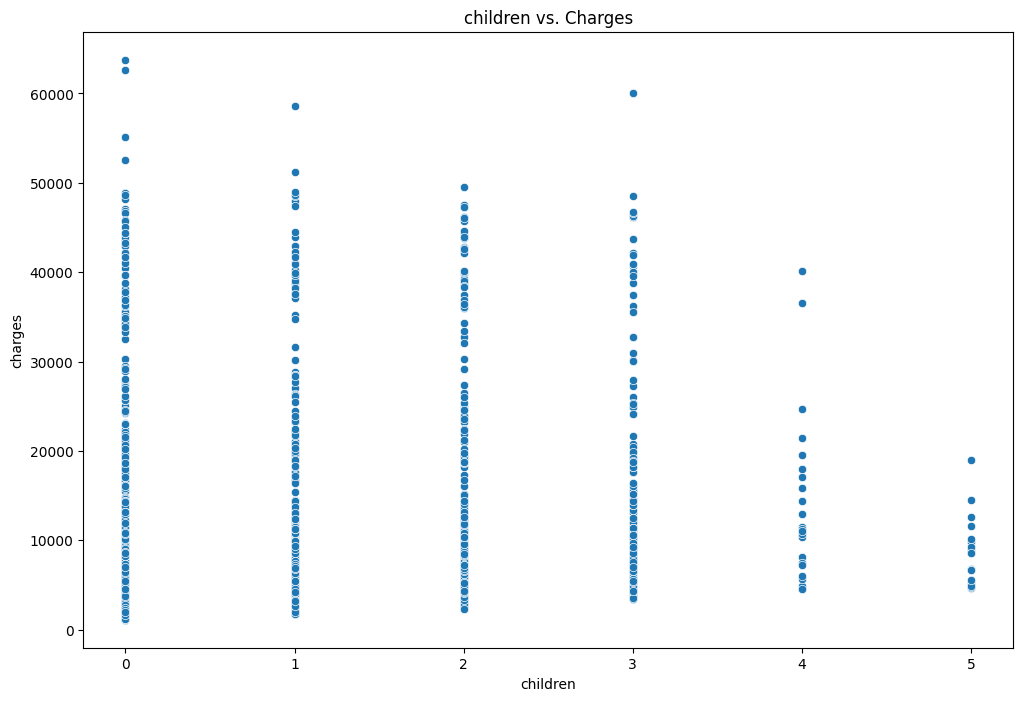

In [14]:
# Create scatter plots
num_col1=['age','bmi','children']
for col in num_col1:
    plt.figure(figsize=(12, 8))
    #plt.subplot(2, 2, 1)  # Adjust subplot positioning here as well
    sns.scatterplot(x=col, y='charges', data=df)
    plt.title(f'{col} vs. Charges')


In [15]:
#categorical columns
cat_cols=['sex','smoker','region']

<ipython-input-16-4e81af6c7a64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2')
<ipython-input-16-4e81af6c7a64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2')
<ipython-input-16-4e81af6c7a64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='Set2')


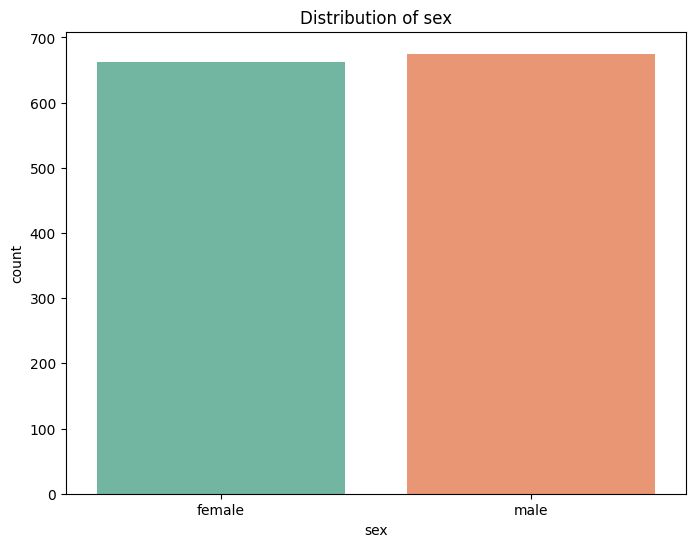

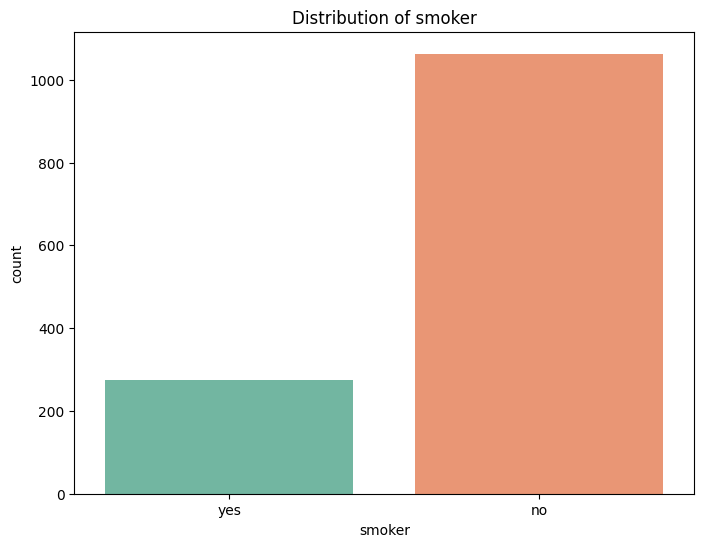

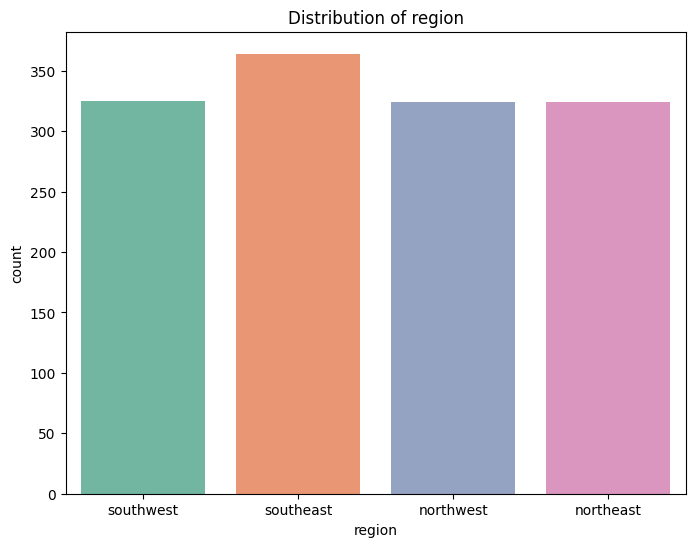

In [16]:
for col in cat_cols:
  plt.figure(figsize=(8,6))
  sns.countplot(data=df,x=col,palette='Set2')
  plt.title(f'Distribution of {col}')

BOXPLOT

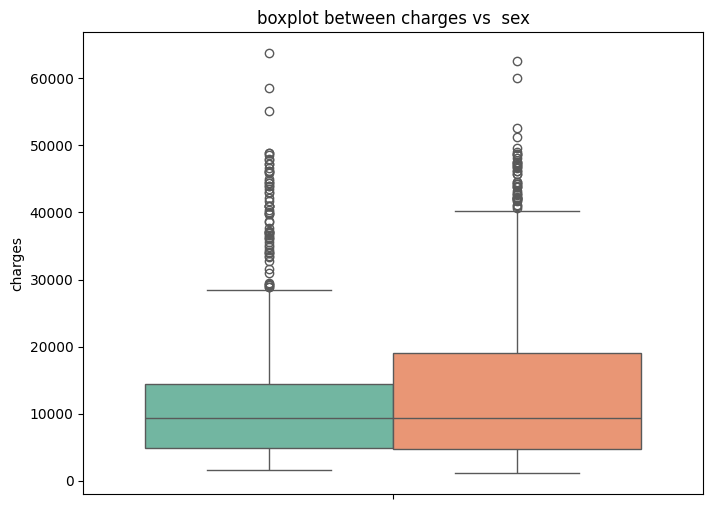

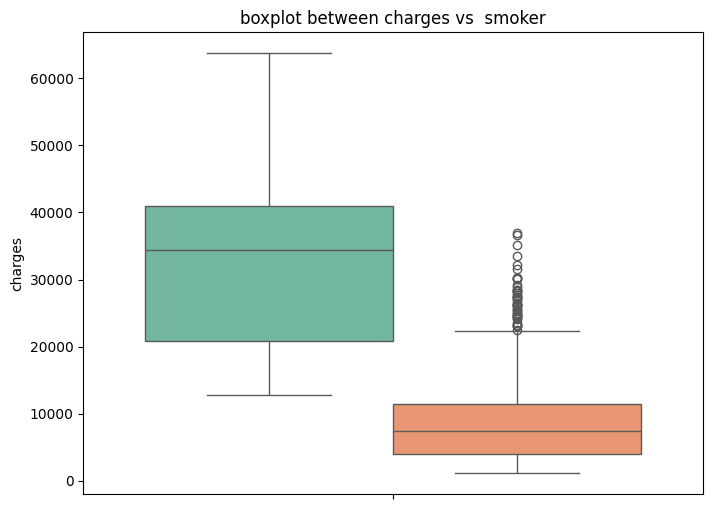

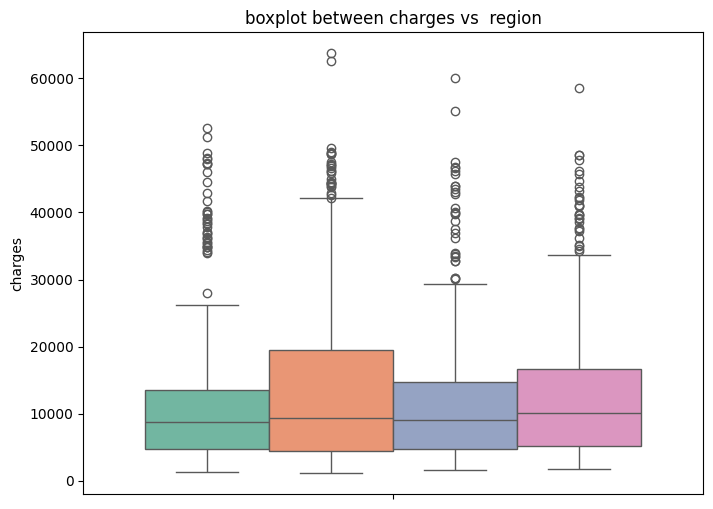

In [17]:
for col in cat_cols:
  plt.figure(figsize=(8,6))
  sns.boxplot(data=df,hue=col,y='charges',palette='Set2',legend=False)
  plt.title(f'boxplot between charges vs  {col}')

CORRELATION

In [18]:
corr_matrix=df[num_cols].corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


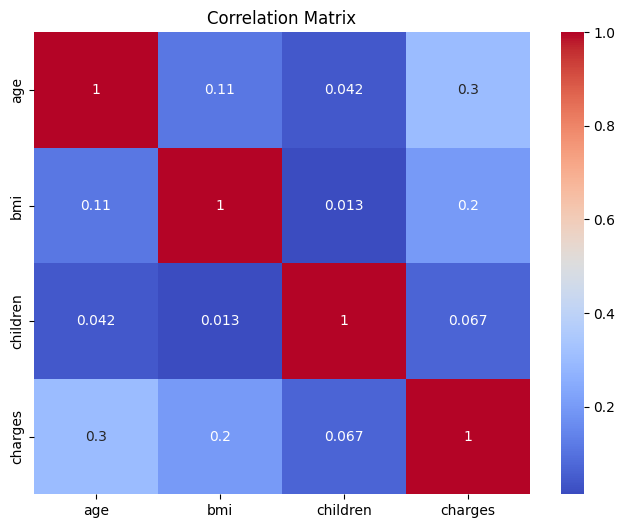

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ENCODE CATEGORICAL VARIABLE

In [20]:
cat_cols

['sex', 'smoker', 'region']

In [26]:
# One Hot Encoding for categorical features
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'],dtype=int)


In [28]:
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#  SCALING

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [30]:
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,1,0,0,1,0,0,0,1
1,-1.511647,0.509422,-0.079442,-0.954381,0,1,1,0,0,0,1,0
2,-0.799350,0.383155,1.580143,-0.729373,0,1,1,0,0,0,1,0
3,-0.443201,-1.305052,-0.909234,0.719104,0,1,1,0,0,1,0,0
4,-0.514431,-0.292456,-0.909234,-0.777499,0,1,1,0,0,1,0,0


In [31]:
x=df_encoded.drop('charges',axis=1)#independent varibales
y=df_encoded['charges']#dependent variable

# Splitting

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
# Predict
y_pred_lr = lr.predict(x_test)


In [39]:
y_pred_lr

array([-4.24211116e-01, -6.23006095e-01,  9.00552379e-02,  1.52541315e+00,
       -3.56583140e-01, -1.06889932e-02,  1.41812989e+00, -9.76870879e-01,
       -2.18580891e-01, -1.61920142e-01, -2.39658738e-01,  1.63882331e+00,
        1.47021158e+00,  3.41389549e-01, -2.04649101e-01, -3.09786432e-01,
       -7.53197735e-01,  1.52425864e+00, -8.30982496e-01, -6.64902528e-01,
       -8.03689754e-01,  1.40466641e+00,  1.33805727e-01,  1.41896822e+00,
        1.47273219e+00, -6.41604975e-01,  1.83580298e+00,  1.92397875e+00,
       -1.54207367e-01,  7.65397773e-02, -5.59794848e-01, -4.57983502e-02,
       -1.06389360e+00, -9.83595088e-02,  2.17912243e+00, -7.76128149e-02,
       -7.05032103e-01, -7.73188622e-01,  1.45232153e+00, -3.56887128e-01,
       -5.14233815e-01,  1.39052360e+00,  1.77611210e+00, -8.15724807e-02,
       -4.89163357e-01, -8.14361038e-01, -5.83742449e-01, -3.54843041e-01,
       -7.44691054e-01, -3.51829889e-01, -5.51604125e-01, -9.90339197e-02,
        1.48404920e+00, -

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
# Evaluation
print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.4f}")



Linear Regression:
R² Score: 0.8069
Mean Squared Error: 0.2421


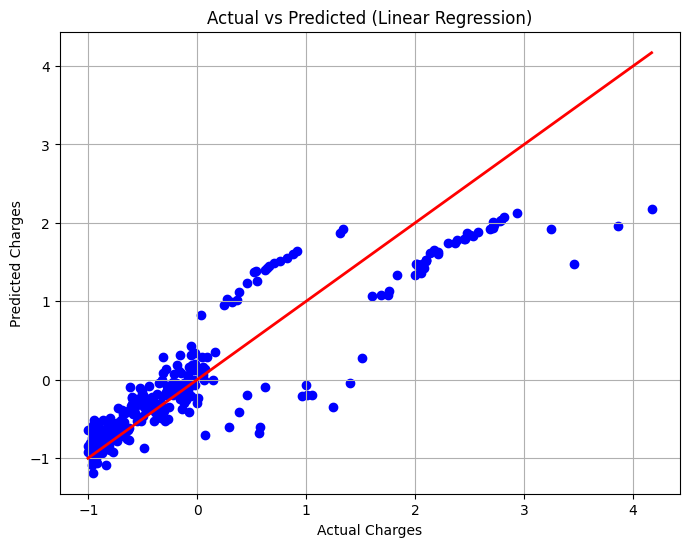

In [42]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

POLYNOMIAL REGRESSION

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)#polynomial regression degree=2
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [45]:
lr1=LinearRegression()
lr1.fit(x_train_poly,y_train)

LinearRegression()

In [46]:
y_pred_poly=lr1.predict(x_test_poly)

In [47]:
# Evaluation
print("Polynomial Regression (Degree 2):")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly):.4f}")

Polynomial Regression (Degree 2):
R² Score: 0.8825
Mean Squared Error: 0.1473


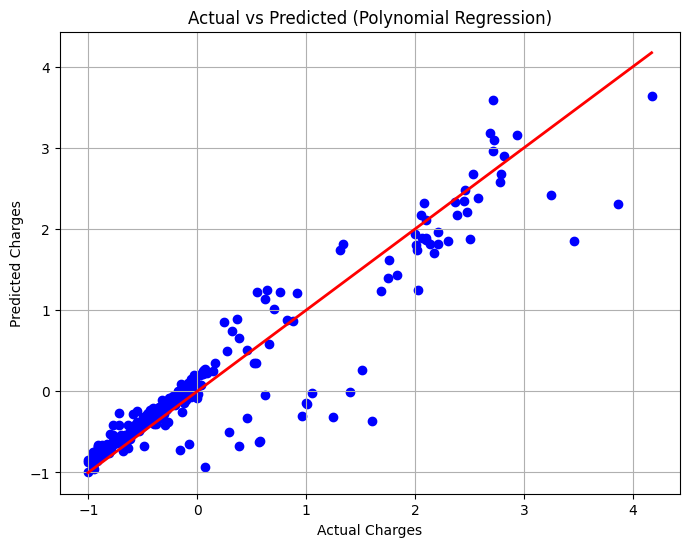

In [48]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

# RIDGE REGRESSION

In [49]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [51]:
# Predict
y_pred_ridge = ridge.predict(x_test)

In [52]:
# Evaluation
print("Ridge Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.4f}")


Ridge Regression:
R² Score: 0.8064
Mean Squared Error: 0.2427


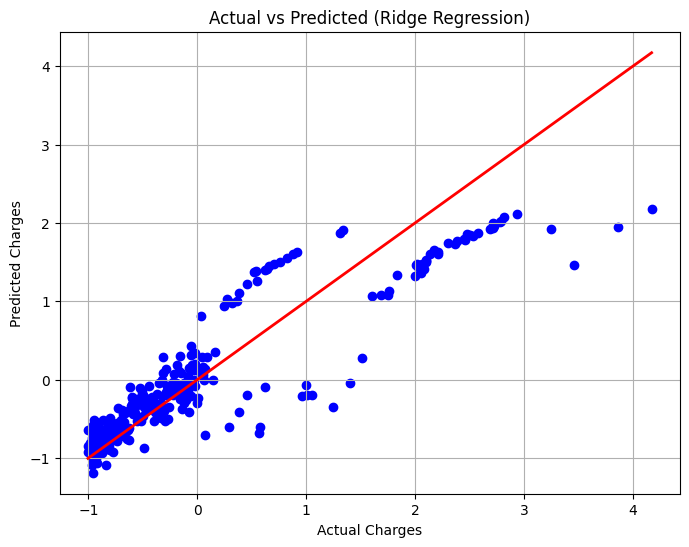

In [53]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted (Ridge Regression)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

# LASSO REGRESSION

In [54]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [55]:
y_pred_lasso=lasso.predict(x_test)

In [56]:
# Evaluation
print("Lasso Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso):.4f}")

Lasso Regression:
R² Score: 0.7975
Mean Squared Error: 0.2539


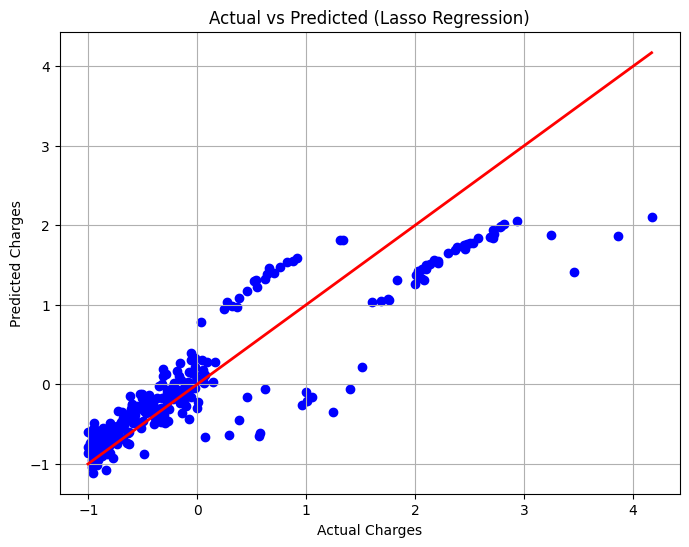

In [57]:
#Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted (Lasso Regression)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [58]:
# Create a dictionary to store the results
results = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_poly), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_poly), mean_squared_error(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_lasso)]
}

# Create a Pandas DataFrame
results_df = pd.DataFrame(results)

# Display the comparison table
results_df


,Model,R² Score,Mean Squared Error
0,Linear Regression,0.806929,0.242086
1,Polynomial Regression,0.882530,0.147292
2,Ridge Regression,0.806414,0.242732
3,Lasso Regression,0.797486,0.253926


HERE BEST MODEL IS POLYNOMIAL REGRESSION MODEL.COMPARED TO OTHER MODELS\ MEAN SQUARED ERROR IS LESS AND R2 SCORE IS HIGH